# **Configuración Inicial**

Descargando la información
Ejecutar cada celda presionando el botón de Play o presionando Ctrl+Enter (Linux y Windows) o Command+Enter (OSX) para descargar las bases de datos.

In [1]:
!curl -L -o "u1.base" "https://drive.google.com/uc?export=download&id=1bGweNw7NbOHoJz11v6ld7ymLR8MLvBsA"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    530      0 --:--:-- --:--:-- --:--:--   530
100 1546k  100 1546k    0     0  1745k      0 --:--:-- --:--:-- --:--:-- 1745k


In [2]:
!curl -L -o "u1.test" "https://drive.google.com/uc?export=download&id=1f_HwJWC_1HFzgAjKAWKwkuxgjkhkXrVg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    841      0 --:--:-- --:--:-- --:--:--   841
100  385k  100  385k    0     0   653k      0 --:--:-- --:--:-- --:--:--  653k


In [3]:
!curl -L -o "u.item" "https://drive.google.com/uc?export=download&id=10YLhxkO2-M_flQtyo9OYV4nT9IvSESuz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    774      0 --:--:-- --:--:-- --:--:--   772
100  230k  100  230k    0     0   362k      0 --:--:-- --:--:-- --:--:--  362k


Los archivos u1.base y u1.test tienen tuplas {usuario, ítem, rating, timestamp}, que es la información de preferencias de usuarios sobre películas en una muestra del dataset movielens.

# **Revisar archivos descargados**

Revisemos cómo es uno de estos archivos:

In [4]:
import pandas as pd

train_file = pd.read_csv('u1.base', sep='\t', names = ['userid', 'itemid', 'rating', 'timestamp'], header=None)

train_file.head()

,userid,itemid,rating,timestamp
0,1,3,4,878542960
1,1,4,3,876893119
2,1,5,3,889751712
3,1,6,5,887431973
4,1,7,4,875071561


In [5]:
train_file[train_file['itemid'] == 1653]

,userid,itemid,rating,timestamp
54444,675,1653,5,889489913


Por otra parte, para obtener información adicional de cada película tal como título, fecha de lanzamiento, género, etc., cargaremos el archivo de items descargado ( u.item ) para poder mapear cada identificador de ítem al conjunto de datos que lo describe. Revisemos el contenido de este archivo.

In [6]:
info_cols = [ 'movieid', 'title', 'release_date', 'video_release_date', 'IMDb_URL', \
              'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', \
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', \
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ]

pd.options.display.max_columns = None

info_file = pd.read_csv('u.item', sep='|', index_col = 0, names = info_cols, header=None, encoding='latin-1')

info_file.head()

,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [7]:
info_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1682 non-null   object 
 1   release_date        1681 non-null   object 
 2   video_release_date  0 non-null      float64
 3   IMDb_URL            1679 non-null   object 
 4   unknown             1682 non-null   int64  
 5   Action              1682 non-null   int64  
 6   Adventure           1682 non-null   int64  
 7   Animation           1682 non-null   int64  
 8   Children            1682 non-null   int64  
 9   Comedy              1682 non-null   int64  
 10  Crime               1682 non-null   int64  
 11  Documentary         1682 non-null   int64  
 12  Drama               1682 non-null   int64  
 13  Fantasy             1682 non-null   int64  
 14  Film-Noir           1682 non-null   int64  
 15  Horror              1682 non-null   int64  
 16  Musica

In [8]:
info_file.describe()

,video_release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Cómo ver la información de una o más películas**
Para esto se hace 3 pasos,

1. Determinar los índices de las películas.
2. Pedir a info_file las columnas.
3. (Adicional) Indicar alguna columna en específico.

In [9]:
# Ejemplo de cómo visualizar títulos de películas en base a sus IDs
pelis = [5,4,1]
info_file.loc[pelis]

,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieid,,,,,,,,,,,,,,,,,,,,,,,
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
info_file.loc[pelis]['title']

movieid
5       Copycat (1995)
4    Get Shorty (1995)
1     Toy Story (1995)
Name: title, dtype: object

In [11]:
!pip install pyreclab

     |████████████████████████████████| 234 kB 5.2 MB/s 


In [12]:
import pyreclab
import numpy as np

# **ItemKNN**
1. Entrenar el modelo.
2. Prediga el rating que le dará un usuario a un ítem. El usuario e ítem quedan a tu criterio.
3. Generar una lista de 5 recomendaciones para un usuario e indique qué películas son.

## **Entrenar el modelo**
Lo primero que se debe hacer es entrenar el modelo, con los datos descargados anteriormente.

In [13]:
myItemKnn = pyreclab.ItemKnn(dataset='u1.base', dlmchar=b'\t', header=False, usercol=0, itemcol=1, ratingcol=2)

In [14]:
#Train the model
myItemKnn.train(k=7, similarity='cosine')

## **Prediga el rating que le dará un usuario a un ítem**
model_name.predict("user_id", "item_id")

In [15]:
myItemKnn.predict("457", "37")

2.932706117630005

# **Genera una lista de 5 recomendaciones para un usuario e indique qué películas son**

Genera 5 recomendaciones para el usuario "457".

In [16]:
reclist_itemKnn = myItemKnn.recommend("457", 5)
pelis_itemKnn = np.array(reclist_itemKnn).astype(int)
info_file.loc[pelis_itemKnn]['title']

movieid
1122                They Made Me a Criminal (1939)
1467          Saint of Fort Washington, The (1993)
1599                 Someone Else's America (1995)
1201    Marlene Dietrich: Shadow and Light (1996) 
1064                              Crossfire (1947)
Name: title, dtype: object

# **Explorar los hiperparámetros del modelo ItemKnn**
Uno de los parámetros que vamos a explorar es el número de vecinos escogidos (Items), para esto calculamos el error del modelo con varios valores de vecinos y observamos cómo es el comportamiento del error.

In [17]:
k_values = [5, 10, 30, 50] # definir distintos valores de vecinos (k)
mae_values = [] # para almacenar resultados de MAE
rmse_values = [] # para almacenar valores de RMSE

for k in k_values:  
  myItemKnn.train(k,'cosine')
  predlist, mae, rmse = myItemKnn.test( input_file = 'u1.test',dlmchar = b'\t', header = False, usercol = 0, itemcol = 1, ratingcol = 2, output_file = 'predictions.csv' )
  rmse_values.append(rmse)   

print(rmse_values)

[0.951746703954097, 0.924552677311984, 0.9193991435698929, 0.9233174098499202]


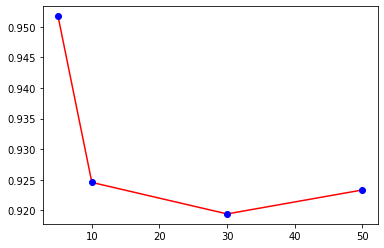

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_values, rmse_values, 'r-')
plt.plot(k_values, rmse_values, 'bo')
plt.show()

Según los resultados: ¿Qué número de vecinos es mejor para hacer recomendaciones con un menor error de predicción?

El mejor número de vecinos es aquel con el que se obtiene el menor error, por ende es igual a 30.

Posteriormente, volvemos a entrenar el modelo con un k = 30 y se observan los resultados. ¿Estos son mejores que los obtenidos anteriormente (k = 7)?¿Por qué?.

In [19]:
myItemKnn.train(k=30, similarity='cosine')

In [20]:
reclist_itemKnn = myItemKnn.recommend("457", 5)
pelis_itemKnn = np.array(reclist_itemKnn).astype(int)
info_file.loc[pelis_itemKnn]['title']

movieid
1201    Marlene Dietrich: Shadow and Light (1996) 
1512        World of Apu, The (Apur Sansar) (1959)
1467          Saint of Fort Washington, The (1993)
1599                 Someone Else's America (1995)
1064                              Crossfire (1947)
Name: title, dtype: object

**Repetir este análisis cambiando la métrica de similaridad usada, teniendo en cuenta las opciones que ofrece pyRecLab**

In [22]:
myItemKnn.train(k=7, similarity='pearson')

In [23]:
myItemKnn.predict("457", "37")

2.773204803466797

In [24]:
reclist_itemKnn = myItemKnn.recommend("457", 5)
pelis_itemKnn = np.array(reclist_itemKnn).astype(int)
info_file.loc[pelis_itemKnn]['title']

movieid
1449                               Pather Panchali (1955)
1398                                          Anna (1996)
1524                                 Kaspar Hauser (1993)
119                Maya Lin: A Strong Clear Vision (1994)
114     Wallace & Gromit: The Best of Aardman Animatio...
Name: title, dtype: object

In [25]:
k_values = [5, 10, 30, 50] # definir distintos valores de vecinos (k)
mae_values = [] # para almacenar resultados de MAE
rmse_values = [] # para almacenar valores de RMSE

for k in k_values:  
  myItemKnn.train(k,'pearson')
  predlist, mae, rmse = myItemKnn.test( input_file = 'u1.test',dlmchar = b'\t', header = False, usercol = 0, itemcol = 1, ratingcol = 2, output_file = 'predictions.csv' )
  rmse_values.append(rmse)   

print(rmse_values)

[1.0298187596823452, 0.9834002769743466, 0.9483754472803007, 0.9412454612459278]


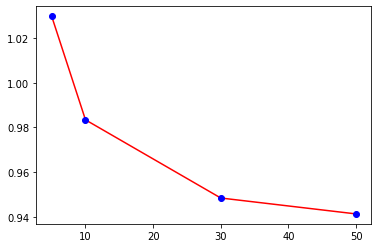

In [26]:
plt.plot(k_values, rmse_values, 'r-')
plt.plot(k_values, rmse_values, 'bo')
plt.show()